In [1]:
import matlab.engine
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from gui_elements import Waveform
from dotenv import load_dotenv
import os

load_dotenv()

root = root_path = os.getenv('ROOT')

eng = matlab.engine.start_matlab()

print("matlab egine started")

matlab egine started


In [2]:
eng.addpath(f"{root}/gui/waveform_functions", nargout=0)



In [ ]:
fs = 48e3
Tsymb = 1e-3
fc = 20e3
M = 16.0
Var = 1.0

Nsymb = 2048

pam_waveform = Waveform(fs = fs, Tsymb = Tsymb, Nsymb= Nsymb ,fc = fc, M =M, modulation = "PAM", var = Var, eng = eng)

In [4]:
pam_waveform.generate_data()
data = pam_waveform.get_data()

data = np.array(data).flatten()

T = len(data)/fs

t = np.linspace(0,T,len(data))

In [5]:
print(pam_waveform.eng)

(0.0, 0.0425)

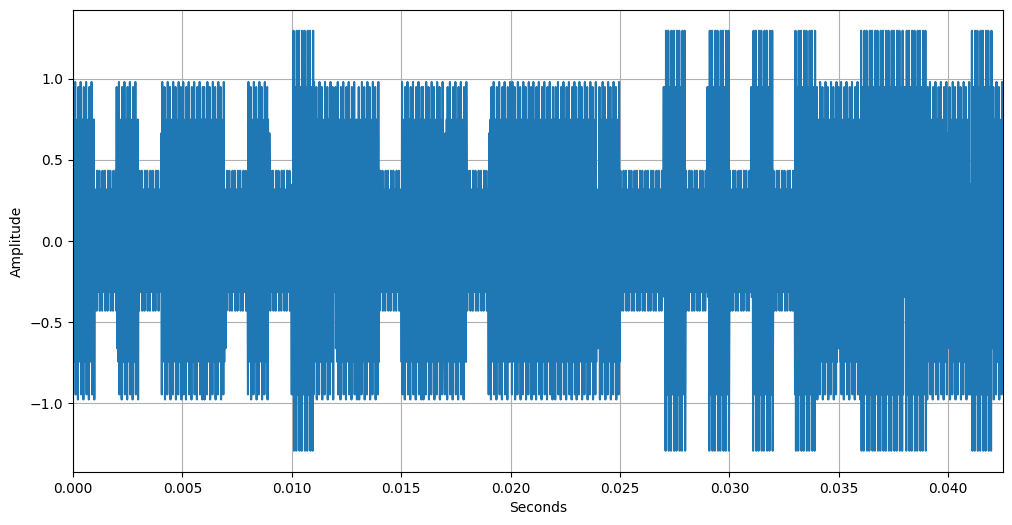

In [6]:
plt.figure(figsize=(12,6))
plt.plot(t,data)
plt.grid(True)
plt.xlabel("Seconds")
plt.ylabel("Amplitude")
plt.xlim([0,0.0425])

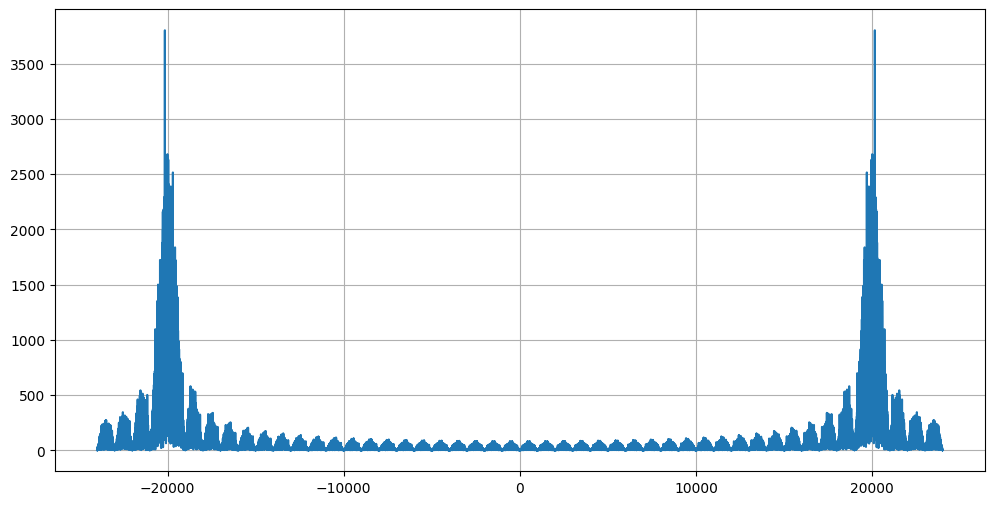

In [7]:
freqs, ft = eng.plotspec_gui(data, 1/fs, nargout = 2)
freqs = np.array(freqs).flatten()
ft = np.array(ft).flatten()

plt.figure(figsize=(12,6))
plt.plot(freqs, np.abs(ft))
plt.grid(True)

In [9]:
# testing json functionality

pam_waveform.to_json(rootpath=root)

QAM-M16_0-fs48000-fc20000-Tsymb0_001
Config saved to: /Users/matthewxu/CursorProjects/FH11_RFML/gui/waveform_data/QAM-M16_0-fs48000-fc20000-Tsymb0_001/config.json
Data saved to: /Users/matthewxu/CursorProjects/FH11_RFML/gui/waveform_data/QAM-M16_0-fs48000-fc20000-Tsymb0_001/data_1.npy
